Menaal Saeed 

W207 | Final Project

Merging Salary Information with Player Statistics (EDA) for 2017-2018 



In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
salaries = pd.read_csv("NBA_season1718_salary.csv", index_col = 0)
stats = pd.read_csv("Seasons_Stats.csv", index_col = 0)
salaries.head()

,Player,Tm,season17_18
1,Stephen Curry,GSW,34682550.0
2,LeBron James,CLE,33285709.0
3,Paul Millsap,DEN,31269231.0
4,Gordon Hayward,BOS,29727900.0
5,Blake Griffin,DET,29512900.0


In [3]:
#make sure no repeats
salaries = salaries.drop_duplicates()

- Player: Player name
- Tm: Team name each player belongs to at the beginning of the 2017-
2018 season
- seson17_18: Salary price for 2017-2018 season (USD)

In [4]:
len(set(salaries.Player))

535

In [5]:
duplicate = salaries[salaries.duplicated(['Player'])]
 
print("Duplicate Rows based on Player Name and Team Name :", duplicate)

Duplicate Rows based on Player Name and Team Name :                    Player   Tm  season17_18
202           Greg Monroe  BOS    5000000.0
217        Jamal Crawford  MIN    4328000.0
261           Rajon Rondo  CHI    3000000.0
298           Dwyane Wade  MIA    2328652.0
300     Richard Jefferson  DEN    2328652.0
306         Jameer Nelson  DET    2262871.0
312            Josh Smith  NOP    2183934.0
332      Anthony Tolliver  SAC    2000000.0
378         Arron Afflalo  SAC    1500000.0
478       Sean Kilpatrick  MIL     789725.0
481       Marco Belinelli  PHI     776217.0
482           Joe Johnson  HOU     749905.0
488        Ersan Ilyasova  PHI     502328.0
498        Ramon Sessions  WAS     263124.0
501          Wade Baldwin  POR     222476.0
502         Isaiah Canaan  CHI     200000.0
504       DeAndre Liggins  NOP     172238.0
505       Sean Kilpatrick  LAC     172238.0
506         Rashad Vaughn  ORL     166258.0
507         Troy Williams  NYK     148318.0
527          Jarell Eddi

In [6]:
duplicate
#I dont think I want to get rid of duplicates because some players made more on other teams
#like Isaiah Canaan went from 53,465.0 to 200,000.0 after switching teams so team could be a 
#factor that is important for our model

,Player,Tm,season17_18
202,Greg Monroe,BOS,5000000.0
217,Jamal Crawford,MIN,4328000.0
261,Rajon Rondo,CHI,3000000.0
298,Dwyane Wade,MIA,2328652.0
300,Richard Jefferson,DEN,2328652.0
306,Jameer Nelson,DET,2262871.0
312,Josh Smith,NOP,2183934.0
332,Anthony Tolliver,SAC,2000000.0
378,Arron Afflalo,SAC,1500000.0
478,Sean Kilpatrick,MIL,789725.0


In [7]:
salaries['Player'].value_counts(dropna = False)

Sean Kilpatrick    3
DeAndre Liggins    3
Briante Weber      3
Jarell Eddie       3
Nigel Hayes        3
                  ..
Bryn Forbes        1
Matt Williams      1
Jimmy Butler       1
Bradley Beal       1
Markelle Fultz     1
Name: Player, Length: 535, dtype: int64

In [8]:
salaries['Tm'].value_counts(dropna = False)

ATL    27
CHI    24
MIL    22
DAL    22
LAL    22
HOU    22
NOP    21
NYK    21
PHO    21
LAC    20
MEM    20
DET    20
UTA    20
SAC    20
PHI    20
POR    19
IND    19
WAS    18
MIA    18
BRK    18
ORL    17
TOR    17
BOS    17
SAS    17
DEN    16
MIN    16
GSW    16
OKC    15
CHO    14
CLE    14
Name: Tm, dtype: int64

In [9]:
salaries['season17_18'].value_counts(dropna = False)


1312611.0     36
50000.0       26
1471382.0     19
815615.0      18
2328652.0     12
              ..
263124.0       1
7250000.0      1
14136364.0     1
17826150.0     1
6352531.0      1
Name: season17_18, Length: 350, dtype: int64

<AxesSubplot:>

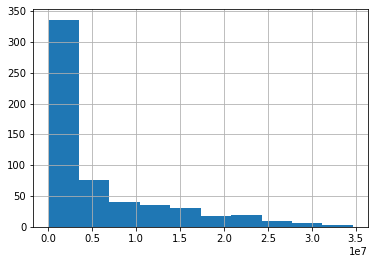

In [10]:
#look at distribution of each variable
salaries.season17_18.hist()
#Very skewed might want to apply log transformation to this as alot make less and only a few make
#alot more

# Read in advanced stats for these 535 unique players

In [11]:
stats.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [12]:
stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Narrow the year down to be in 2017-2018 which leaves 595 rows 

In [13]:
#get rid of players who dnot have a team name as wont have a way to identify them in other datasets
#if we are unaware as teams can change

In [14]:
sum(stats.Tm.isnull())
stats.dropna(subset = ['Tm'], inplace = True)

In [15]:
len(stats)

24624

In [16]:
stats_filt = stats.loc[(stats.Year == 2017.0) | (stats.Year == 2018.0)]

In [17]:
stats_filt

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24096,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
24097,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
24098,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,0.355,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
24099,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,0.587,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
24100,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [18]:
len(set(stats_filt.Player))

486

Merge the salary information with the statistics information based on the player name and the team name 

In [19]:
merged_data = pd.merge(stats_filt, salaries, on=['Player', 'Tm'])

In [20]:
len(set(merged_data.Player))
#only have 269 players now - so can try to expand scope by adding more data for across more
#years and using year as a factor in the analysis

269

In [21]:
len(merged_data)

270

In [22]:
salaries_bigger = pd.read_excel("Player - Salaries per Year (1990 - 2017) 2.xlsx")


In [23]:
salaries_bigger.columns

Index(['Register Value', 'Player Name', 'Salary in $', 'Season Start',
       'Season End', 'Team', 'Full Team Name'],
      dtype='object')

In [24]:
#filter from 2014-2018
salaries_bigger_filt = salaries_bigger.loc[salaries_bigger['Season Start'] >= 2014]
stats_filt_2 = stats.loc[stats['Year'] >= 2014.0]

In [25]:
#make sure team abbreviations are consistent 
print(sorted(list(set(salaries_bigger_filt.Team))))
print("______________________")
print(sorted(list(set(stats_filt_2.Tm))))


['ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']
______________________
['ATL', 'BOS', 'BRK', 'CHA', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'TOT', 'UTA', 'WAS']


In [26]:
#replace the following as theyre abbreviations are off 
tm_abbrev = {
#"BRK":  'BRK',
#"BKN":"BRK",
#"CHO":"CHO",
"CHO":"CHA",
"NOP": "NOH"
}

In [27]:
stats_filt_2['Tm'] = stats_filt_2.Tm.replace(tm_abbrev)

<ipython-input-27-d5d0cda0dce3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_filt_2['Tm'] = stats_filt_2.Tm.replace(tm_abbrev)


In [28]:
salaries_bigger_filt

,Register Value,Player Name,Salary in $,Season Start,Season End,Team,Full Team Name
19,10717,A.J. Hammons,650000,2016,2017,DAL,Dallas Mavericks
20,11326,A.J. Hammons,1312611,2017,2018,MIA,Miami Heat
25,9627,A.J. Price,62552,2014,2015,PHO,Phoenix Suns
34,10154,Aaron Brooks,2000000,2015,2016,CHI,Chicago Bulls
35,10718,Aaron Brooks,2700000,2016,2017,IND,Indiana Pacers
...,...,...,...,...,...,...,...
11805,11325,Zaza Pachulia,2898000,2016,2017,GSW,Golden State Warriors
11806,11836,Zaza Pachulia,3477600,2017,2018,GSW,Golden State Warriors
11817,11837,Zhou Qi,815615,2017,2018,HOU,Houston Rockets
11818,10153,Zoran Dragic,1962103,2014,2015,MIA,Miami Heat


In [29]:
print(sorted(list(set(salaries_bigger_filt.Team))))
print("______________________")
print(sorted(list(set(stats_filt_2.Tm))))


['ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']
______________________
['ATL', 'BOS', 'BRK', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOH', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'TOT', 'UTA', 'WAS']


In [30]:
print(sorted(list(set(salaries_bigger_filt['Season Start']))))
print(sorted(list(set(stats_filt_2.Year))))


[2014, 2015, 2016, 2017]
[2014.0, 2015.0, 2016.0, 2017.0]


In [31]:
salaries_bigger_filt.rename(columns = {'Player Name': "Player", "Team": "Tm", "Season Start": "Year"}, inplace = True)

/Users/menaals/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [32]:
merged_big = pd.merge(stats_filt_2, salaries_bigger_filt, on = ['Player', 'Tm', "Year"])

<AxesSubplot:>

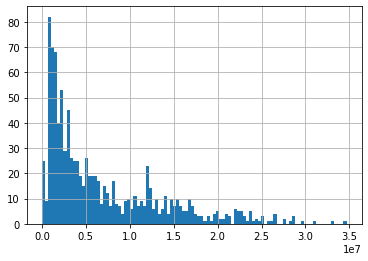

In [137]:
merged_big['Salary in $'].hist(bins = 100)

<AxesSubplot:xlabel='Salary in $', ylabel='Count'>

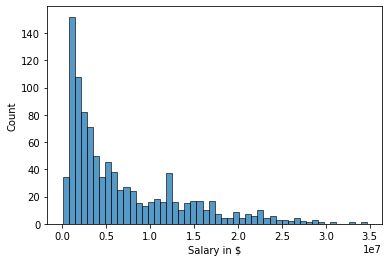

In [177]:
sns.histplot(data=merged_big, x="Salary in $", bins=50)

<AxesSubplot:xlabel='Log Transformed Salary', ylabel='Count'>

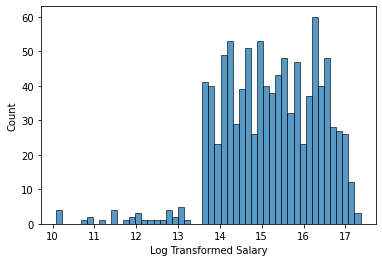

In [181]:
merged_big['Log Transformed Salary'] = np.log(merged_big['Salary in $'])
sns.histplot(data=merged_big, x="Log Transformed Salary", bins=50)

<AxesSubplot:>

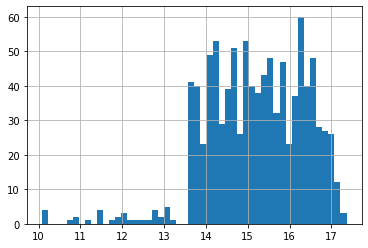

In [180]:
np.log(merged_big['Salary in $']).hist(bins = 50)

In [165]:
data_2018 = merged_big.loc[merged_big.Year == 2017].sort_values(by=['Salary in $'], ascending = False).head(5)

In [173]:
#https://www.statology.org/seaborn-barplot-show-values/
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

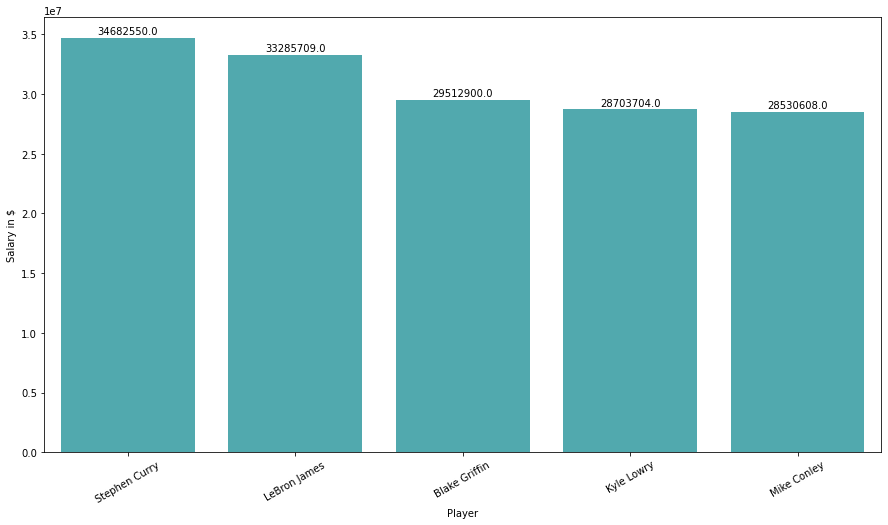

In [175]:
import seaborn as sns
#sns.barplot(data=data_2018, x="Player", y="Salary in $", )
plt.figure(figsize = (15,8))
ax = sns.barplot(data=data_2018, x="Player", y="Salary in $", color='#42b7bd')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
show_values(ax)

In [149]:
merged_big.sort_values(by=['Salary in $'], ascending = False)
#can make barchart for in 2018 - the highest paid players

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,Register Value,Salary in $,Season End,Full Team Name
766,2017.0,Stephen Curry,PG,28.0,GSW,79.0,79.0,2638.0,24.6,0.624,...,523.0,143.0,17.0,239.0,183.0,1999.0,11770,34682550,2018,Golden State Warriors
839,2017.0,LeBron James,SF,32.0,CLE,74.0,74.0,2794.0,27.0,0.619,...,646.0,92.0,44.0,303.0,134.0,1954.0,11638,33285709,2018,Cleveland Caveliers
577,2016.0,LeBron James,SF,31.0,CLE,76.0,76.0,2709.0,27.5,0.588,...,514.0,104.0,49.0,249.0,143.0,1920.0,11083,30963450,2017,Cleveland Caveliers
810,2017.0,Blake Griffin,PF,27.0,LAC,61.0,61.0,2076.0,22.7,0.569,...,300.0,58.0,23.0,142.0,157.0,1316.0,11365,29512900,2018,Los Angeles Clippers
871,2017.0,Kyle Lowry,PG,30.0,TOR,60.0,60.0,2244.0,22.9,0.623,...,417.0,88.0,19.0,173.0,170.0,1344.0,11626,28703704,2018,Toronto Raptors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2014.0,Chris Babb,SG,23.0,BOS,14.0,0.0,132.0,3.7,0.367,...,3.0,6.0,0.0,3.0,13.0,22.0,9710,48028,2015,Boston Celtic
959,2017.0,Beno Udrih,PG,34.0,DET,39.0,0.0,560.0,16.1,0.535,...,131.0,13.0,0.0,37.0,29.0,227.0,11363,25000,2018,Detroit Pistons
955,2017.0,Axel Toupane,SF,24.0,NOH,2.0,0.0,41.0,8.6,0.688,...,0.0,1.0,1.0,0.0,5.0,11.0,11359,25000,2018,New Orleans Pelicans
760,2017.0,Quinn Cook,PG,23.0,NOH,9.0,0.0,111.0,15.3,0.614,...,14.0,3.0,0.0,5.0,7.0,52.0,11725,25000,2018,New Orleans Pelicans


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'PER'}>,
        <AxesSubplot:title={'center':'TS%'}>],
       [<AxesSubplot:title={'center':'3PAr'}>,
        <AxesSubplot:title={'center':'FTr'}>,
        <AxesSubplot:title={'center':'ORB%'}>,
        <AxesSubplot:title={'center':'DRB%'}>,
        <AxesSubplot:title={'center':'TRB%'}>,
        <AxesSubplot:title={'center':'AST%'}>,
        <AxesSubplot:title={'center':'STL%'}>],
       [<AxesSubplot:title={'center':'BLK%'}>,
        <AxesSubplot:title={'center':'TOV%'}>,
        <AxesSubplot:title={'center':'USG%'}>,
        <AxesSubplot:title={'center':'blanl'}>,
        <AxesSubplot:title={'center':'OWS'}>,
        <AxesSubplot:title={'center':'DWS'}>,
        <AxesSubplot:title={'center':'WS'}>],
       [<AxesSubplot:tit

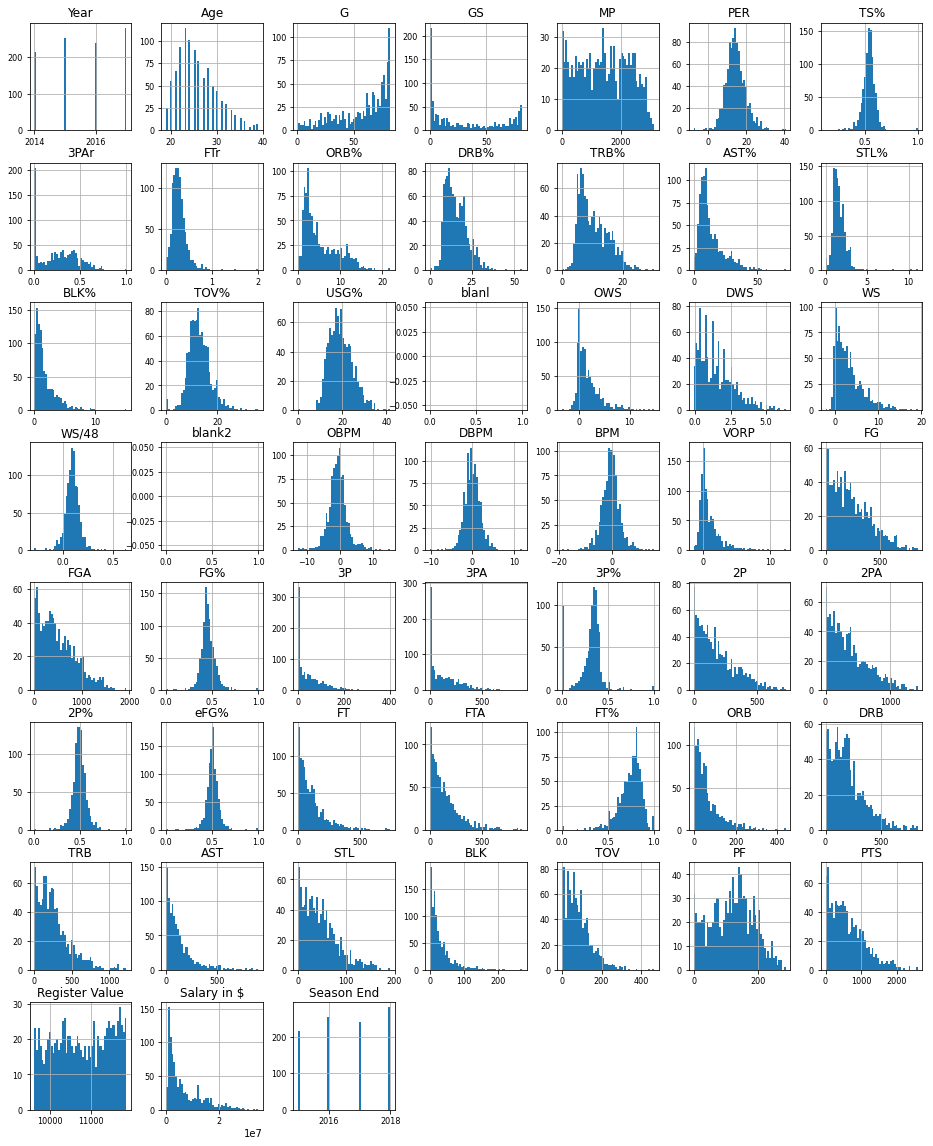

In [57]:
list(set(merged_big.dtypes.tolist()))
# include only float and integer
merged_big_num = merged_big.select_dtypes(include = ['float64', 'int64'])
# display what has been selected
merged_big_num.head()
# plot
merged_big_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Could remove the ones with no distribution
- blan1
- blank2


In [41]:
df_corr = merged_big.corr()
df_corr
#

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Register Value,Salary in $,Season End
Year,1.000000,0.003646,-0.015975,-0.041823,-0.044370,-0.029699,0.068317,0.119486,-0.044213,-0.062292,...,-0.036425,-0.016339,-0.035558,-0.033845,-0.066499,-0.074773,-0.032076,0.969720,0.142654,1.000000
Age,0.003646,1.000000,0.054782,0.034743,0.057935,0.101584,0.153903,0.061531,-0.058340,-0.088882,...,0.037440,0.092324,0.029989,-0.015224,0.027154,0.000779,0.054515,0.014735,0.254161,0.003646
G,-0.015975,0.054782,1.000000,0.593007,0.849859,0.246893,0.219681,0.009491,-0.014093,-0.018041,...,0.641714,0.488241,0.664740,0.443995,0.636550,0.839637,0.673837,-0.001272,0.297082,-0.015975
GS,-0.041823,0.034743,0.593007,1.000000,0.848902,0.463531,0.238594,-0.104954,0.096893,0.012014,...,0.691881,0.580735,0.705177,0.483203,0.725064,0.709921,0.797293,-0.035763,0.565870,-0.041823
MP,-0.044370,0.057935,0.849859,0.848902,1.000000,0.448659,0.269267,-0.001375,0.056560,-0.089875,...,0.731355,0.675721,0.826662,0.485452,0.828175,0.856397,0.899561,-0.035624,0.542764,-0.044370
PER,-0.029699,0.101584,0.246893,0.463531,0.448659,1.000000,0.663611,-0.343266,0.266735,0.273069,...,0.526126,0.437622,0.419977,0.420052,0.529488,0.366893,0.625900,-0.032342,0.515075,-0.029699
TS%,0.068317,0.153903,0.219681,0.238594,0.269267,0.663611,1.000000,-0.112161,0.134681,0.165706,...,0.290602,0.113123,0.181982,0.263274,0.189476,0.262066,0.291719,0.073255,0.231986,0.068317
3PAr,0.119486,0.061531,0.009491,-0.104954,-0.001375,-0.343266,-0.112161,1.000000,-0.403138,-0.676708,...,-0.355707,0.071234,0.076580,-0.376689,-0.068751,-0.151454,-0.026425,0.125621,-0.092617,0.119486
FTr,-0.044213,-0.058340,-0.014093,0.096893,0.056560,0.266735,0.134681,-0.403138,1.000000,0.381575,...,0.266009,0.032959,0.051495,0.270273,0.146061,0.125388,0.104406,-0.051239,0.155779,-0.044213
ORB%,-0.062292,-0.088882,-0.018041,0.012014,-0.089875,0.273069,0.165706,-0.676708,0.381575,1.000000,...,0.431243,-0.315145,-0.196099,0.438612,-0.118061,0.162353,-0.113619,-0.061704,-0.012490,-0.062292


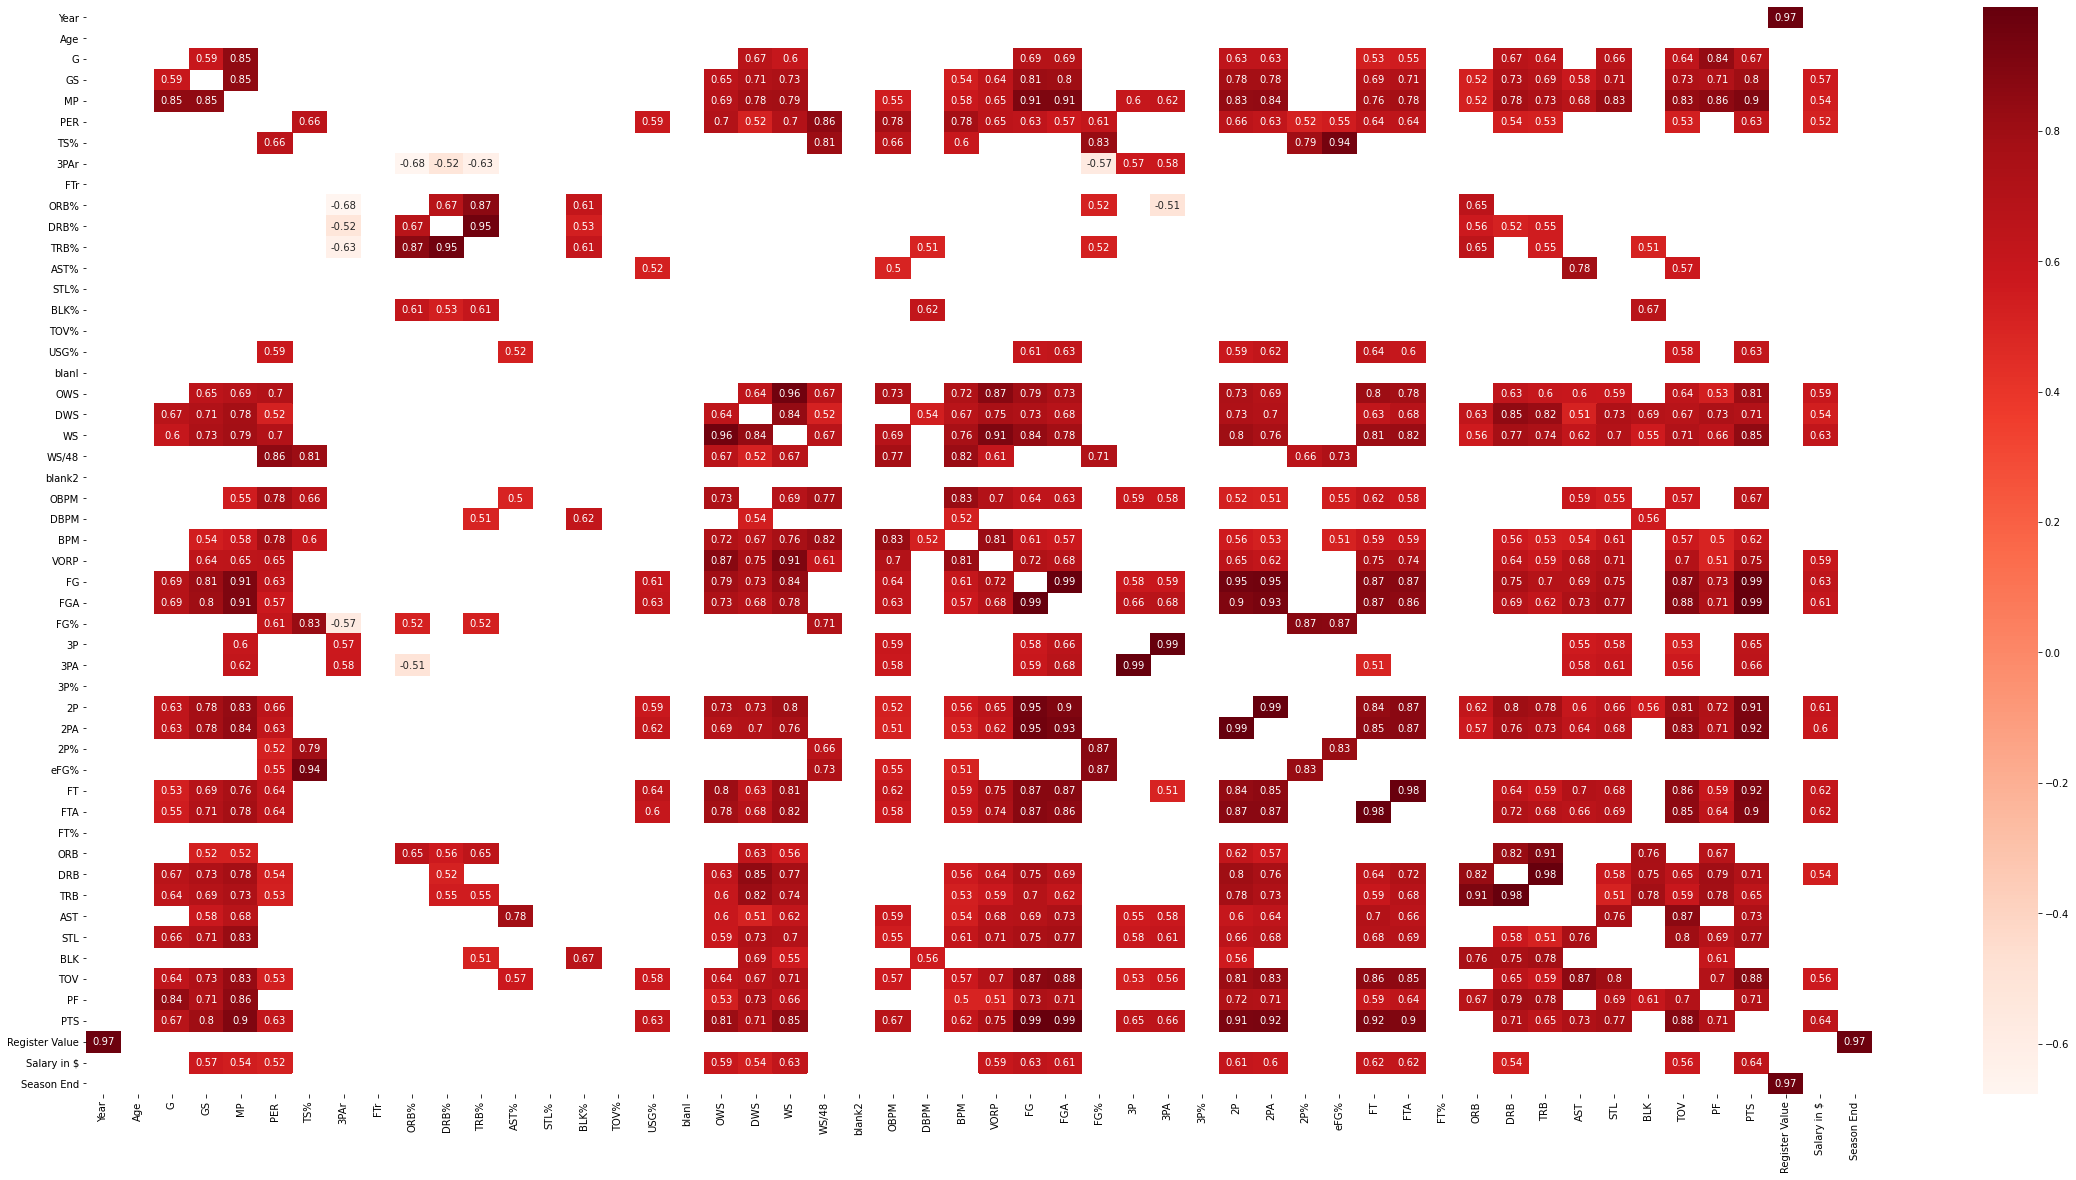

In [51]:
#dfCorr = df.corr()
filteredDf = df_corr [((df_corr  >= .5) | (df_corr  <= -.5)) & (df_corr  !=1.000)]
plt.figure(figsize=(40,20))
sn.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [62]:
pairs_corrs = pd.DataFrame(df_corr.unstack().sort_values(ascending = False).drop_duplicates()).reset_index()
pairs_corrs.columns = ['col1', 'col2', "corr"]
pairs_corrs

,col1,col2,corr
0,Year,Year,1.000000
1,3P,3PA,0.989827
2,PTS,FG,0.989721
3,2PA,2P,0.989169
4,FGA,PTS,0.988196
...,...,...,...
1220,DRB%,3PAr,-0.522439
1221,3PAr,FG%,-0.569702
1222,TRB%,3PAr,-0.631102
1223,ORB%,3PAr,-0.676708


In [69]:
pairs_corrs.loc[pairs_corrs['corr'] >= 0.9]

,col1,col2,corr
0,Year,Year,1.000000
1,3P,3PA,0.989827
2,PTS,FG,0.989721
3,2PA,2P,0.989169
4,FGA,PTS,0.988196
5,FG,FGA,0.985085
6,DRB,TRB,0.984222
7,FTA,FT,0.979274
8,Year,Register Value,0.969720
9,Register Value,Season End,0.969720


maybe do some PCA instead of hand picking the ones to get rid of
- G and MP and G and GS are redundant  (keep G) 
- Register Value and Year (get rid of season end and register value) 
- 
- get rid of 2P
- get rid of 

In [120]:
keep_cols = df_corr.loc[df_corr['Salary in $'] > 0.3].index
len(keep_cols)
#could use these as initital parameters bc they are correlated with the salary (Y) variable

30

In [121]:
list(keep_cols) + ["Year"]

['GS',
 'MP',
 'PER',
 'AST%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 '3P',
 '3PA',
 '2P',
 '2PA',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Salary in $',
 'Year']

In [140]:
new_df = merged_big[list(keep_cols) + ["Year", "Age"]]
new_df


,GS,MP,PER,AST%,USG%,OWS,DWS,WS,WS/48,OBPM,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salary in $,Year,Age
0,20.0,1197.0,11.2,4.9,11.7,0.9,1.9,2.9,0.114,-2.1,...,332.0,43.0,40.0,57.0,71.0,203.0,265.0,2184960,2014.0,20.0
1,30.0,951.0,14.6,6.6,16.3,1.2,0.9,2.1,0.104,-1.5,...,277.0,40.0,23.0,46.0,63.0,187.0,328.0,981084,2014.0,25.0
2,2.0,330.0,19.1,6.4,13.0,0.6,0.6,1.2,0.178,-2.6,...,129.0,14.0,8.0,30.0,18.0,40.0,92.0,981084,2014.0,25.0
3,69.0,2498.0,21.8,13.0,29.8,4.0,3.5,7.5,0.144,-0.4,...,765.0,178.0,63.0,68.0,123.0,147.0,1603.0,16006000,2014.0,28.0
4,0.0,112.0,17.5,9.0,17.3,0.2,0.2,0.4,0.180,-1.7,...,34.0,6.0,2.0,6.0,4.0,11.0,40.0,948163,2014.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.0,135.0,11.4,18.0,27.8,-0.2,0.1,-0.1,-0.022,-3.5,...,17.0,15.0,4.0,0.0,5.0,5.0,68.0,1471382,2017.0,24.0
986,74.0,2237.0,14.9,8.4,16.5,1.9,2.7,4.6,0.099,0.0,...,449.0,122.0,114.0,30.0,96.0,135.0,814.0,14796348,2017.0,28.0
987,58.0,1725.0,16.7,9.1,15.5,3.4,2.2,5.6,0.157,-0.2,...,405.0,99.0,62.0,58.0,65.0,189.0,639.0,12584270,2017.0,24.0
988,18.0,843.0,6.9,6.1,14.4,-0.3,0.8,0.5,0.030,-3.6,...,125.0,36.0,15.0,16.0,40.0,78.0,240.0,1312611,2017.0,22.0


In [141]:
new_df['Salary in $'] = np.log2(new_df['Salary in $'])

<ipython-input-141-df154b5d2d2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Salary in $'] = np.log2(new_df['Salary in $'])


In [142]:
new_df

,GS,MP,PER,AST%,USG%,OWS,DWS,WS,WS/48,OBPM,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salary in $,Year,Age
0,20.0,1197.0,11.2,4.9,11.7,0.9,1.9,2.9,0.114,-2.1,...,332.0,43.0,40.0,57.0,71.0,203.0,265.0,21.059175,2014.0,20.0
1,30.0,951.0,14.6,6.6,16.3,1.2,0.9,2.1,0.104,-1.5,...,277.0,40.0,23.0,46.0,63.0,187.0,328.0,19.904017,2014.0,25.0
2,2.0,330.0,19.1,6.4,13.0,0.6,0.6,1.2,0.178,-2.6,...,129.0,14.0,8.0,30.0,18.0,40.0,92.0,19.904017,2014.0,25.0
3,69.0,2498.0,21.8,13.0,29.8,4.0,3.5,7.5,0.144,-0.4,...,765.0,178.0,63.0,68.0,123.0,147.0,1603.0,23.932109,2014.0,28.0
4,0.0,112.0,17.5,9.0,17.3,0.2,0.2,0.4,0.180,-1.7,...,34.0,6.0,2.0,6.0,4.0,11.0,40.0,19.854776,2014.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.0,135.0,11.4,18.0,27.8,-0.2,0.1,-0.1,-0.022,-3.5,...,17.0,15.0,4.0,0.0,5.0,5.0,68.0,20.488740,2017.0,24.0
986,74.0,2237.0,14.9,8.4,16.5,1.9,2.7,4.6,0.099,0.0,...,449.0,122.0,114.0,30.0,96.0,135.0,814.0,23.818738,2017.0,28.0
987,58.0,1725.0,16.7,9.1,15.5,3.4,2.2,5.6,0.157,-0.2,...,405.0,99.0,62.0,58.0,65.0,189.0,639.0,23.585118,2017.0,24.0
988,18.0,843.0,6.9,6.1,14.4,-0.3,0.8,0.5,0.030,-3.6,...,125.0,36.0,15.0,16.0,40.0,78.0,240.0,20.324008,2017.0,22.0


Fit a Model

In [143]:
from sklearn.model_selection import train_test_split
X = new_df.drop('Salary in $', axis = 1)
Y = new_df['Salary in $']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33,random_state = 5 )
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(663, 31)
(327, 31)
(663,)
(327,)


In [ ]:
#baseline model:


In [144]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,Y_train)

Y_pred = LinReg.predict(X_test)

In [182]:
import sklearn
import numpy as np
print(LinReg.score(X_test , Y_test))
# mean absolute error which is the average of all predicted error values ,where all predicted error values are forced to be positive 
print(sklearn.metrics.mean_absolute_error(Y_test, Y_pred))
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(sklearn.metrics.mean_absolute_percentage_error(Y_test, Y_pred))
#MAPE - find
#root mean squared error is the root of the average of the squared predicted error values.
print(np.sqrt(mse))

0.5299017166221174
0.8601955287856944
0.04142436407023566
1.234821045881247


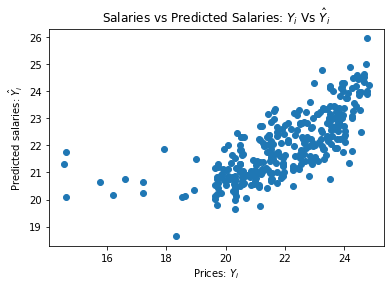

In [146]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted salaries: $\hat{Y}_i$")
plt.title("Salaries vs Predicted Salaries: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [136]:
#However you can analyze your model using Mean absolute error ,Mean squared error ,Root mean squared error,Max error,median error R-square etc. 

In [35]:
#merged_big.to_excel("player_salaries_2014_2018_test.xlsx")

In [44]:
#see duplicate player name rows - this is because as the players age increases - the data changes so 
#this might be interesting to see how it plays out in the further modeling
#merged_big[merged_big.duplicated(['Player'])].sort_values()


In [ ]:
len(merged_big)
#990 examples now

In [1]:
pip install jqmcvi

ERROR: Could not find a version that satisfies the requirement jqmcvi
ERROR: No matching distribution found for jqmcvi
Note: you may need to restart the kernel to use updated packages.
